In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)

Shape of dataset: (891, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [36]:
print("\nMissing Values per Column:\n", df.isnull().sum())


Missing Values per Column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [44]:
# Filling 'Embarked' with mode
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

In [40]:
# Filling 'Age' with median
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

In [42]:
# Drop 'Cabin' (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

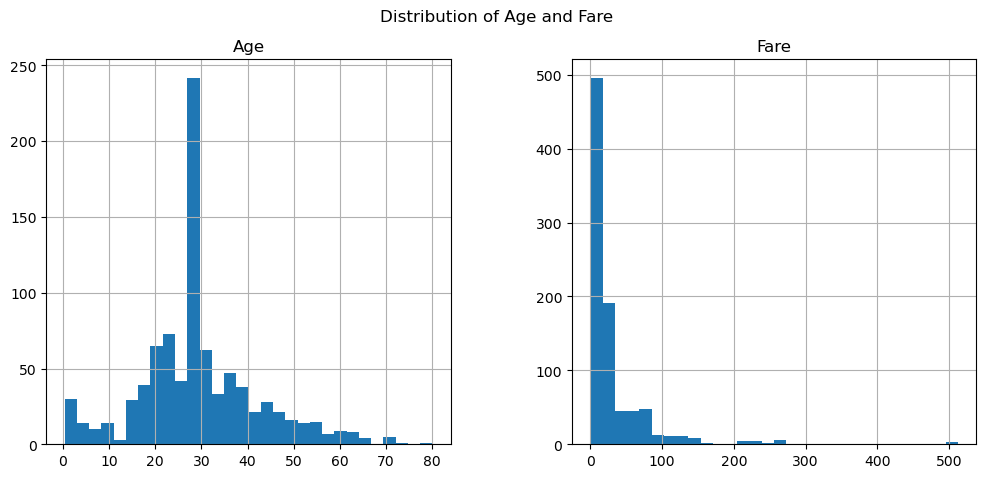

In [46]:
df[['Age', 'Fare']].hist(bins=30, figsize=(12,5), layout=(1,2))
plt.suptitle('Distribution of Age and Fare')
plt.show()

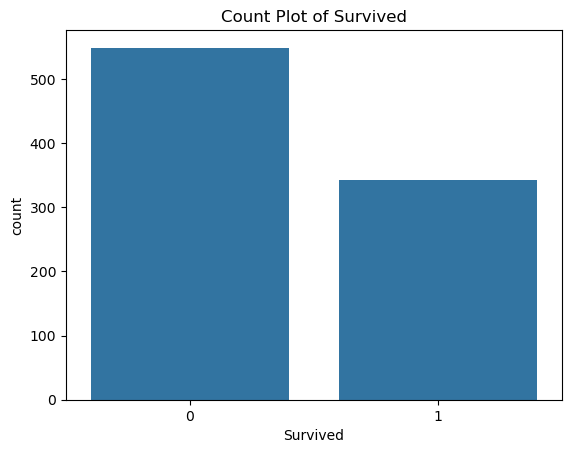

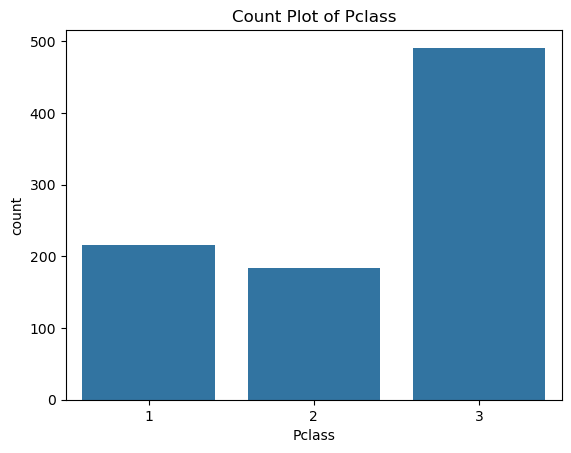

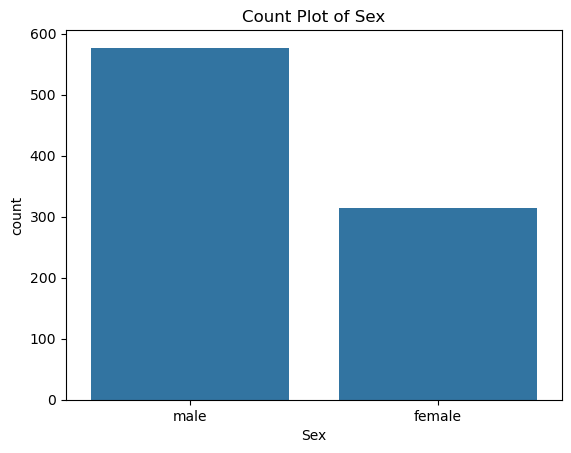

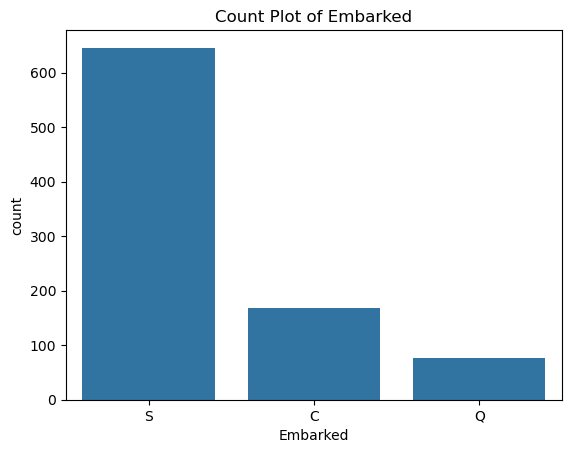

In [48]:
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.show()

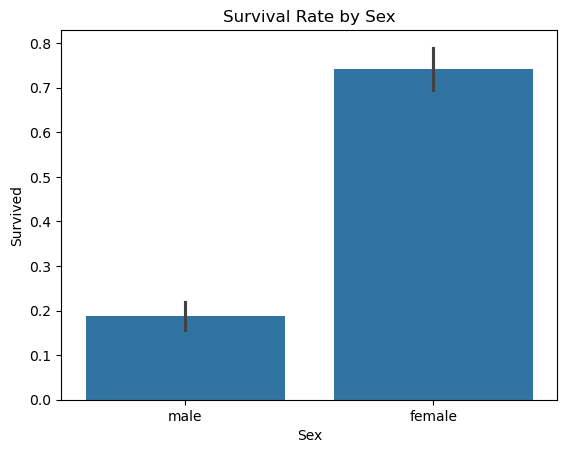

In [50]:
# Survival Rate by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

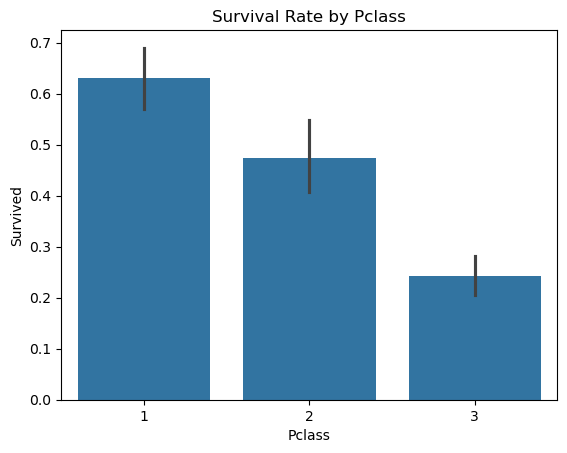

In [52]:
# Survival Rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

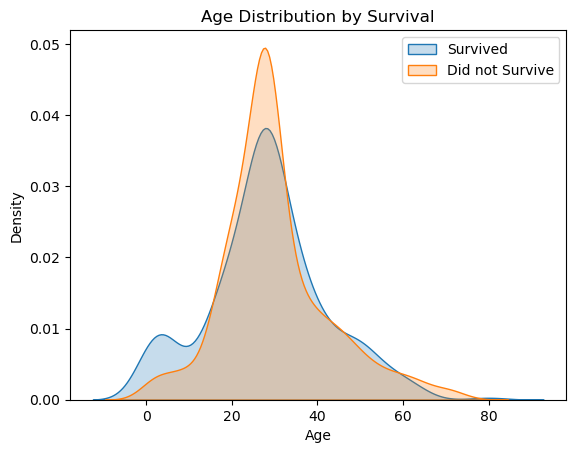

In [54]:
# Age Distribution by Survival
sns.kdeplot(df[df['Survived']==1]['Age'], shade=True, label='Survived')
sns.kdeplot(df[df['Survived']==0]['Age'], shade=True, label='Did not Survive')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

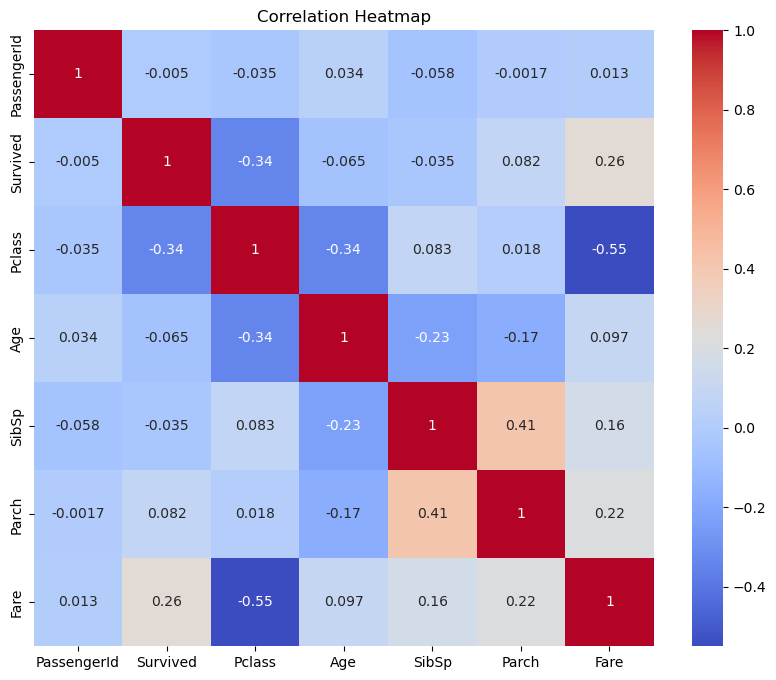

In [60]:
# Numerical Correlation Matrix
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


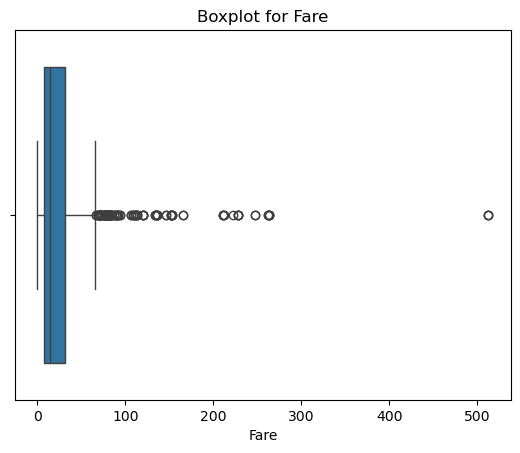

In [58]:
# Boxplot for Fare
sns.boxplot(x=df['Fare'])
plt.title('Boxplot for Fare')
plt.show()

In [66]:
df1 = pd.read_csv('test.csv')
df1.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
print("Shape of dataset:", df1.shape)
print("\nData Types:\n", df1.dtypes)

Shape of dataset: (418, 11)

Data Types:
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [72]:
print("\nMissing Values per Column:\n", df1.isnull().sum())


Missing Values per Column:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [76]:
# Filling 'Fare' with median
median_fare = df1['Fare'].median()
df1['Fare'].fillna(median_fare, inplace=True)

In [80]:
# Filling 'Age' with median
median_age_test = df1['Age'].median()
df1['Age'].fillna(median_age_test, inplace=True)

In [84]:
# Droping 'Cabin' column (too many missing)
df1.drop('Cabin', axis=1, inplace=True)

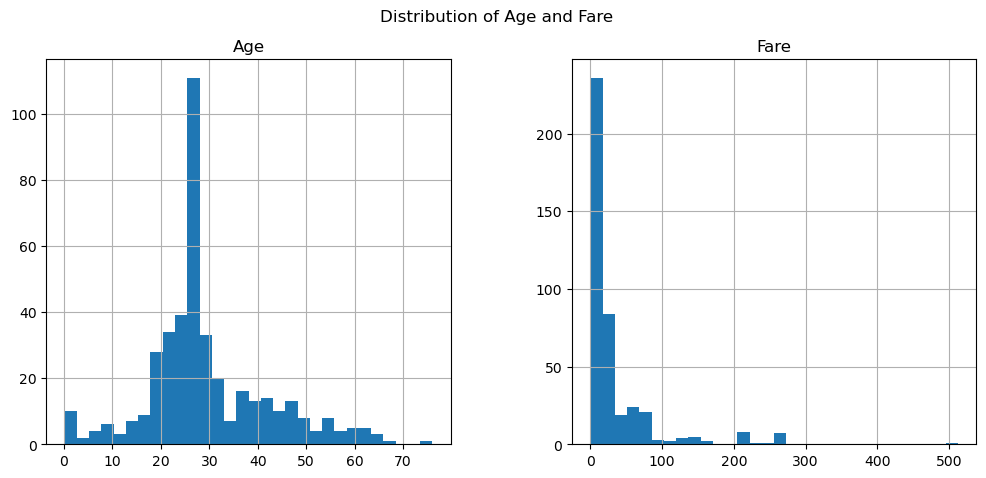

In [88]:
df1[['Age', 'Fare']].hist(bins=30, figsize=(12,5), layout=(1,2))
plt.suptitle('Distribution of Age and Fare')
plt.show()

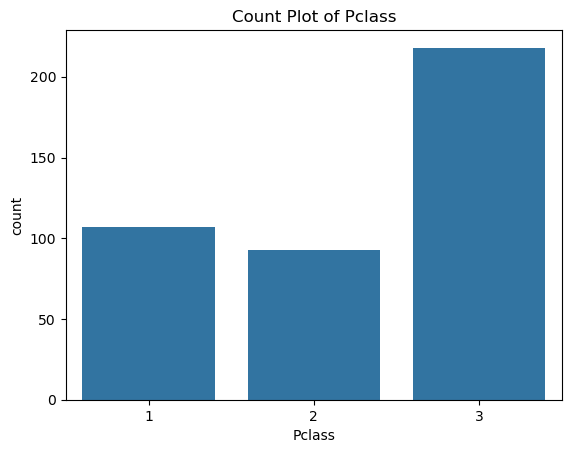

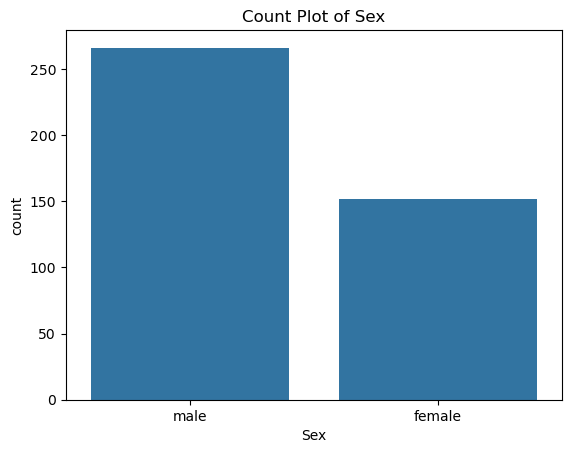

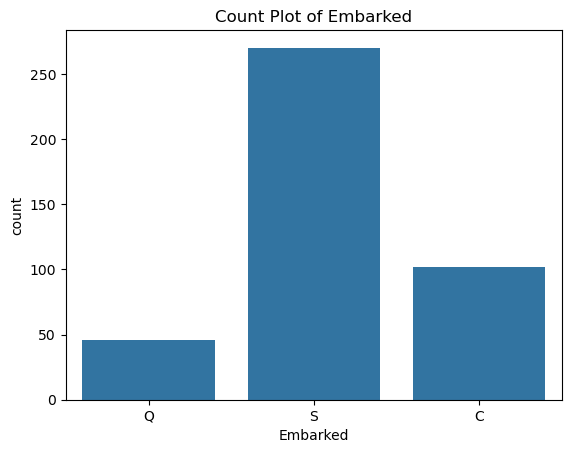

In [90]:
categorical_cols_test = ['Pclass', 'Sex', 'Embarked']
for col in categorical_cols_test:
    sns.countplot(x=col, data=df1)
    plt.title(f'Count Plot of {col}')
    plt.show()

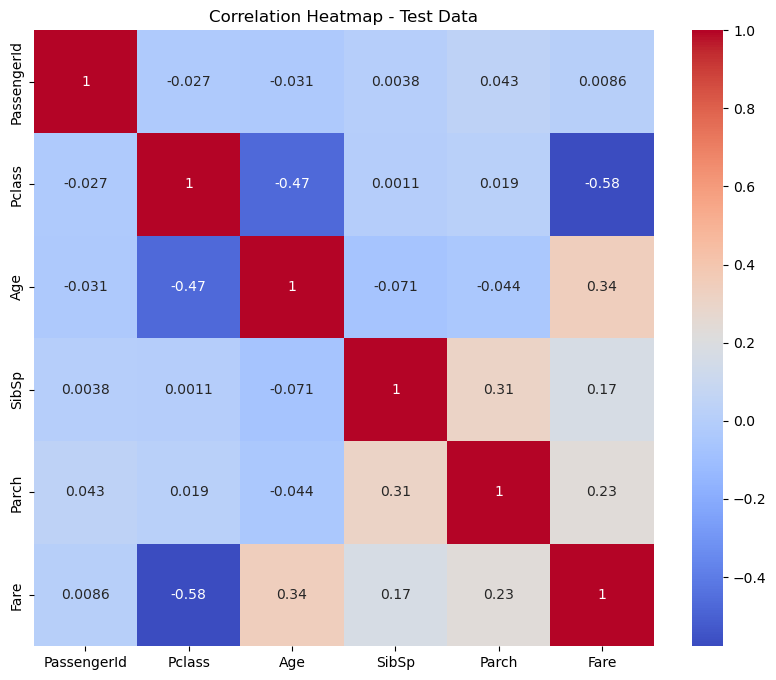

In [94]:
numeric_test = df1.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_test.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Test Data')
plt.show()

In [100]:
df2 = pd.read_csv('gender_submission.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [104]:
print("Shape of dataset:", df2.shape)
print("\nData Types:\n", df2.dtypes)

Shape of dataset: (418, 2)

Data Types:
 PassengerId    int64
Survived       int64
dtype: object


In [106]:
print("\nMissing Values per Column:\n", df2.isnull().sum())


Missing Values per Column:
 PassengerId    0
Survived       0
dtype: int64


In [108]:
df2.duplicated().sum()

0

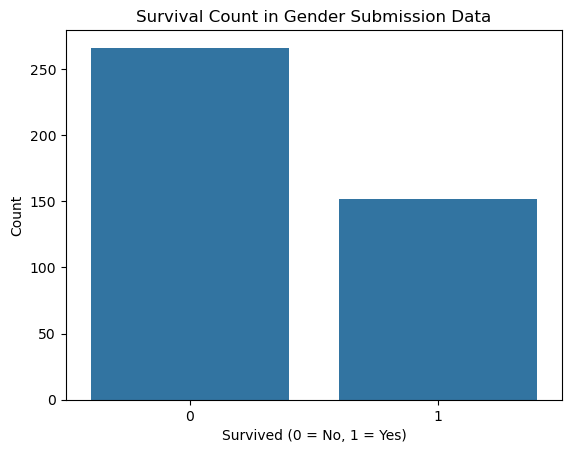

In [112]:
sns.countplot(x='Survived', data=df2)
plt.title('Survival Count in Gender Submission Data')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [116]:
survival_rate = df2['Survived'].value_counts(normalize=True) * 100
print("\nSurvival Rate (%):\n", survival_rate)


Survival Rate (%):
 Survived
0    63.636364
1    36.363636
Name: proportion, dtype: float64
